<a href="https://colab.research.google.com/github/MathurUtkarsh/Stock_Price_Prediction_Using_LSTM/blob/main/LSTM_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas_datareader as pdr

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key='5928cf4525fb056059be5795e39caf093d3d8fae')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-09-19 00:00:00+00:00,158.73,159.77,158.44,159.51,20347352,37.659223,37.905967,37.590420,37.844281,81389408,0.0,1.0
1,AAPL,2017-09-20 00:00:00+00:00,156.07,158.26,153.83,157.90,51693239,37.028129,37.547714,36.496682,37.462303,206772956,0.0,1.0
2,AAPL,2017-09-21 00:00:00+00:00,153.39,155.80,152.75,155.80,36643382,36.392290,36.964071,36.240448,36.964071,146573528,0.0,1.0
3,AAPL,2017-09-22 00:00:00+00:00,151.89,152.27,150.56,152.02,46114424,36.036410,36.126567,35.720863,36.067253,184457696,0.0,1.0
4,AAPL,2017-09-25 00:00:00+00:00,150.55,151.83,149.16,149.99,43922334,35.718491,36.022175,35.388709,35.585629,175689336,0.0,1.0


In [9]:

df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-09-12 00:00:00+00:00,163.43,164.26,159.3000,159.590,104955962,163.43,164.26,159.3000,159.590,104955962,0.0,1.0
1254,AAPL,2022-09-13 00:00:00+00:00,153.84,160.54,153.3700,159.900,122656614,153.84,160.54,153.3700,159.900,122656614,0.0,1.0
1255,AAPL,2022-09-14 00:00:00+00:00,155.31,157.10,153.6106,154.785,87965409,155.31,157.10,153.6106,154.785,87965409,0.0,1.0
1256,AAPL,2022-09-15 00:00:00+00:00,152.37,155.24,151.3800,154.650,90481110,152.37,155.24,151.3800,154.650,90481110,0.0,1.0
1257,AAPL,2022-09-16 00:00:00+00:00,150.70,151.35,148.3700,151.210,162278841,150.70,151.35,148.3700,151.210,162278841,0.0,1.0


In [15]:
df1 = df['close']

In [23]:
df1

0       158.73
1       156.07
2       153.39
3       151.89
4       150.55
         ...  
1253    163.43
1254    153.84
1255    155.31
1256    152.37
1257    150.70
Name: close, Length: 1258, dtype: float64

In [22]:
df1.shape

(1258,)

In [18]:
df = df.drop(['close'], axis=1)

In [19]:
df = df.reset_index()

In [20]:
df

,index,symbol,date,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2017-09-19 00:00:00+00:00,159.77,158.4400,159.510,20347352,37.659223,37.905967,37.590420,37.844281,81389408,0.0,1.0
1,1,AAPL,2017-09-20 00:00:00+00:00,158.26,153.8300,157.900,51693239,37.028129,37.547714,36.496682,37.462303,206772956,0.0,1.0
2,2,AAPL,2017-09-21 00:00:00+00:00,155.80,152.7500,155.800,36643382,36.392290,36.964071,36.240448,36.964071,146573528,0.0,1.0
3,3,AAPL,2017-09-22 00:00:00+00:00,152.27,150.5600,152.020,46114424,36.036410,36.126567,35.720863,36.067253,184457696,0.0,1.0
4,4,AAPL,2017-09-25 00:00:00+00:00,151.83,149.1600,149.990,43922334,35.718491,36.022175,35.388709,35.585629,175689336,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2022-09-12 00:00:00+00:00,164.26,159.3000,159.590,104955962,163.430000,164.260000,159.300000,159.590000,104955962,0.0,1.0
1254,1254,AAPL,2022-09-13 00:00:00+00:00,160.54,153.3700,159.900,122656614,153.840000,160.540000,153.370000,159.900000,122656614,0.0,1.0
1255,1255,AAPL,2022-09-14 00:00:00+00:00,157.10,153.6106,154.785,87965409,155.310000,157.100000,153.610600,154.785000,87965409,0.0,1.0
1256,1256,AAPL,2022-09-15 00:00:00+00:00,155.24,151.3800,154.650,90481110,152.370000,155.240000,151.380000,154.650000,90481110,0.0,1.0


In [24]:
df.shape

(1258, 14)

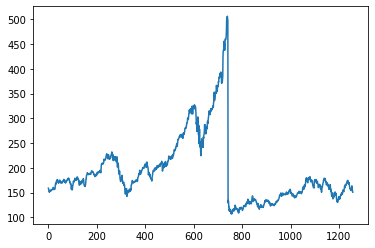

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [27]:
import numpy as np

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
df1.shape

(1258, 1)

In [30]:
df1

array([[0.12996869],
       [0.1233062 ],
       [0.11659361],
       ...,
       [0.12140263],
       [0.11403882],
       [0.10985598]])

In [31]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [32]:
training_size,test_size

(817, 441)

In [33]:
train_data

array([[1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],
       [1.18697558e-01],
       [1.16318096e-01],
       [1.18422041e-01],
       [1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],
       [1.21377583e-01],
       [1.22730119e-01],
       [1.22880401e-01],
       [1.24508453e-01],
       [1.23130870e-01],
       [1.25610520e-01],
       [1.32849092e-01],
       [1.34326863e-01],
       [1.32548528e-01],
       [1.23080776e-01],
       [1.23757044e-01],
       [1.23556669e-01],
       [1.25886036e-01],
       [1.24157796e-01],
       [1.26662492e-01],
       [1.40788979e-01],
       [1.49981215e-01],
       [1.55792110e-01],
       [1.50407013e-01],
       [1.53462743e-01],
       [1.64458359e-01],
       [1.68841578e-01],
       [1.70244208e-01],
       [1.73825924e-01],
       [1.72924233e-01],
       [1.69893550e-01],
       [1.68140263e-01],


In [34]:
test_data

array([[0.05252348],
       [0.05475266],
       [0.04963056],
       [0.05357545],
       [0.0627176 ],
       [0.06041327],
       [0.06294302],
       [0.07476518],
       [0.07020664],
       [0.06732624],
       [0.0647464 ],
       [0.056531  ],
       [0.06053851],
       [0.0494928 ],
       [0.06031309],
       [0.06314339],
       [0.05545398],
       [0.05500313],
       [0.06023795],
       [0.05527865],
       [0.05084534],
       [0.05257358],
       [0.0630933 ],
       [0.07521603],
       [0.08072636],
       [0.09036944],
       [0.09097057],
       [0.0882154 ],
       [0.07576706],
       [0.06291797],
       [0.06837821],
       [0.0705072 ],
       [0.06787727],
       [0.07651847],
       [0.07494051],
       [0.07531622],
       [0.07306199],
       [0.07150908],
       [0.07085786],
       [0.07145899],
       [0.06599875],
       [0.06011271],
       [0.0572824 ],
       [0.05768316],
       [0.04798998],
       [0.04763932],
       [0.04636193],
       [0.035

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
# time step = 1 means xt ddepends on x(x-1)
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 116ms/step - loss: 0.0386 - val_loss: 0.0019
Epoch 2/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 0.0023
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0107 - val_loss: 6.2759e-04
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0108 - val_loss: 3.6902e-04
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0094 - val_loss: 4.8757e-04
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0078 - val_loss: 0.0012
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0069 - val_loss: 4.1375e-04
Epoch 8/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0063 - val_loss: 2.7386e-04
Epoch 9/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 4.0530e-04
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss:

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.8.2'

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

232.56489027583015

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

154.73907150840049

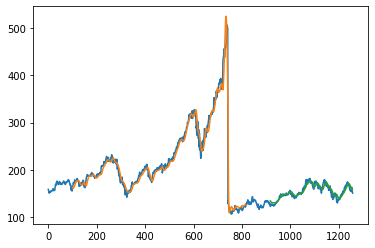

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

441

In [52]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0843581715716969,
 0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.09653099561678141,
 0.09843456480901686,
 0.10487163431433938,
 0.10299311208515965,
 0.0896681277395115,
 0.07586725109580456,
 0.0627175954915466,
 0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.074840325610519

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12384021]
101
1 day input [0.12455855 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793
 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775
 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941
 0.09084534 0.08395742 0.08435817 0.09252348 0.107201   0.10519724
 0.10487163 0.11113338 0.096531   0.09843456 0.10487163 0.10299311
 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1258

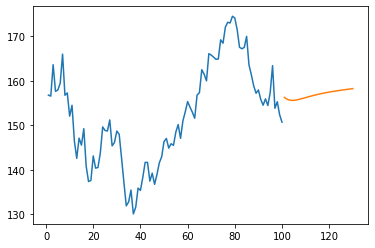

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

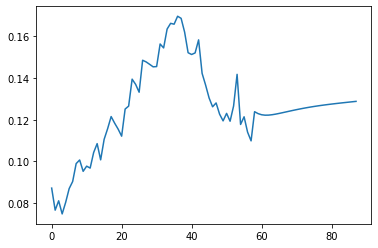

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [66]:
df3=scaler.inverse_transform(df3).tolist()

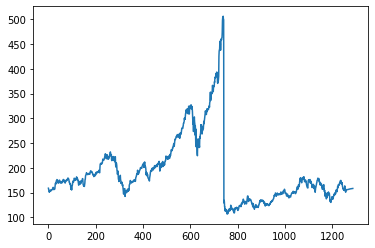

In [67]:
plt.plot(df3)